In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
import keras
from keras.models import Sequential
from keras.layers import *
import os
import cv2
from sklearn.compose import ColumnTransformer
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import pathlib
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap

In [ ]:
from google.colab import drive
drive.mount('/mntDrive')

Mounted at /mntDrive


# Build a deep learning classification

In [ ]:
df = pd.read_csv('/mntDrive/MyDrive/AI/mobile-price-dataset/train.csv')

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [ ]:
X = df.drop('price_range', axis='columns')
y = df['price_range']

In [ ]:
print(np.unique(y))

[0 1 2 3]


In [ ]:
X.shape

(2000, 20)

In [ ]:
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [ ]:
X.values

array([[8.420e+02, 0.000e+00, 2.200e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.021e+03, 1.000e+00, 5.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [5.630e+02, 1.000e+00, 5.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [1.911e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [1.512e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [5.100e+02, 1.000e+00, 2.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00]])

In [ ]:
y.values

array([1, 2, 2, ..., 3, 0, 3])

In [ ]:
X = X.values

In [ ]:
y = y.values

In [ ]:
scale = StandardScaler()
X = scale.fit_transform(X)

In [ ]:
y = y.reshape(-1,1)

In [ ]:
y.shape

(2000, 1)

In [ ]:
y[1]

array([2])

In [ ]:
ohot = OneHotEncoder()
y = ohot.fit_transform(y)

In [ ]:
y = y.toarray()

In [ ]:
print(y[1])

[0. 0. 1. 0.]


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=50)

In [ ]:
model = Sequential()
model.add(Dense(8,activation='relu',input_dim = 20))
model.add(Dense(6,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 168       
                                                                 
 dense_1 (Dense)             (None, 6)                 54        
                                                                 
 dense_2 (Dense)             (None, 4)                 28        
                                                                 
Total params: 250
Trainable params: 250
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,epochs=130, validation_data=(X_valid,y_valid), batch_size=64)

Epoch 1/130
25/25 [==============================] - 5s 13ms/step - loss: 1.4851 - accuracy: 0.2706 - val_loss: 1.4434 - val_accuracy: 0.2975
Epoch 2/130
25/25 [==============================] - 0s 5ms/step - loss: 1.4323 - accuracy: 0.2831 - val_loss: 1.4103 - val_accuracy: 0.2825
Epoch 3/130
25/25 [==============================] - 0s 5ms/step - loss: 1.4037 - accuracy: 0.2900 - val_loss: 1.3939 - val_accuracy: 0.2800
Epoch 4/130
25/25 [==============================] - 0s 5ms/step - loss: 1.3872 - accuracy: 0.3050 - val_loss: 1.3824 - val_accuracy: 0.2950
Epoch 5/130
25/25 [==============================] - 0s 5ms/step - loss: 1.3748 - accuracy: 0.3094 - val_loss: 1.3734 - val_accuracy: 0.3050
Epoch 6/130
25/25 [==============================] - 0s 4ms/step - loss: 1.3635 - accuracy: 0.3269 - val_loss: 1.3636 - val_accuracy: 0.3150
Epoch 7/130
25/25 [==============================] - 0s 7ms/step - loss: 1.3517 - accuracy: 0.3344 - val_loss: 1.3522 - val_accuracy: 0.3150
Epoch 8/130


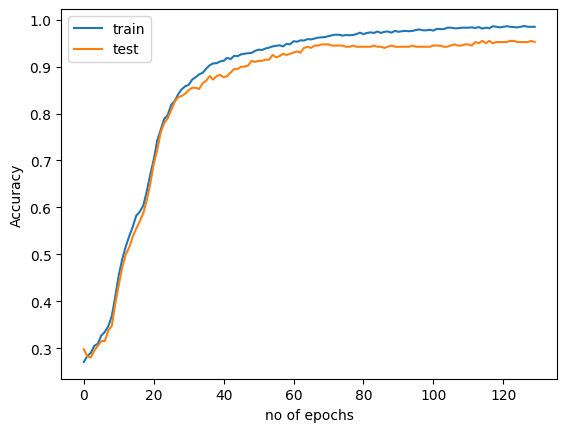

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('no of epochs')
plt.ylabel('Accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()

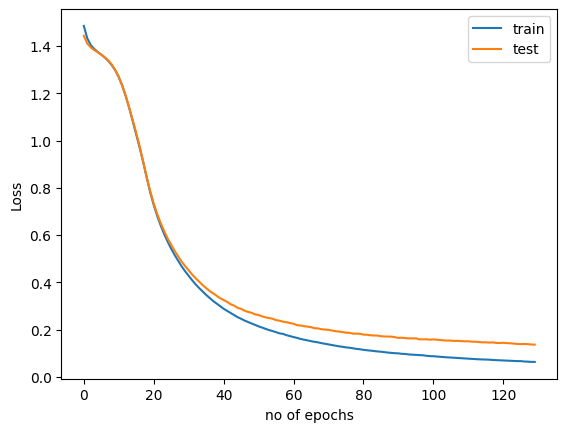

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('no of epochs')
plt.ylabel('Loss')
plt.legend(['train','test'], loc='upper right')
plt.show()

In [ ]:
y_pred = model.predict(X_valid)

pred = []
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))

test = []
for i in range(len(y_valid)):
    test.append(np.argmax(y_valid[i]))

13/13 [==============================] - 0s 2ms/step


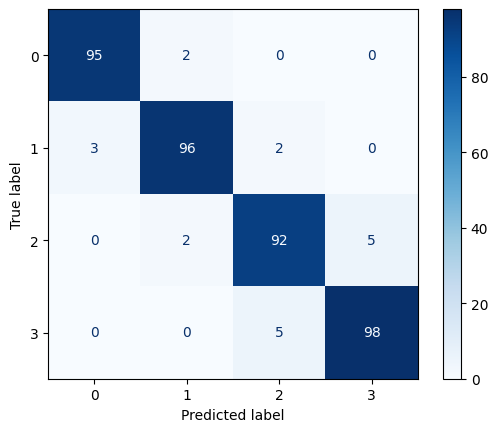

In [ ]:
cm = confusion_matrix(test, pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
report = classification_report(test, pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        97
           1       0.96      0.95      0.96       101
           2       0.93      0.93      0.93        99
           3       0.95      0.95      0.95       103

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



# Convolutional Neural Network model for an image classification

In [ ]:
dataset_path = os.listdir('/mntDrive/MyDrive/AI/Fruit360-dataset')
print(dataset_path)

['Banana', 'Peach', 'Strawberry', 'Avocado', 'Mango', 'Apricot']


In [ ]:
class_labels = []

for item in dataset_path:
  all_classes = os.listdir('/mntDrive/MyDrive/AI/Fruit360-dataset' + '/' + item)
  for fruit in all_classes:
    class_labels.append((item, str('datasetpath' + '/' + item) + '/' + fruit))

In [ ]:
df = pd.DataFrame(data=class_labels, columns=['labels', 'images'])
print(df.head())
print(df.tail())

   labels                            images
0  Banana  datasetpath/Banana/r_291_100.jpg
1  Banana   datasetpath/Banana/r_77_100.jpg
2  Banana  datasetpath/Banana/r_181_100.jpg
3  Banana  datasetpath/Banana/r_278_100.jpg
4  Banana  datasetpath/Banana/r_168_100.jpg
       labels                             images
2886  Apricot  datasetpath/Apricot/r_285_100.jpg
2887  Apricot    datasetpath/Apricot/222_100.jpg
2888  Apricot  datasetpath/Apricot/r_103_100.jpg
2889  Apricot  datasetpath/Apricot/r_186_100.jpg
2890  Apricot    datasetpath/Apricot/306_100.jpg


In [ ]:
print("Total number of images in the dataset: ", len(df))
print('------------------')
label_count = df['labels'].value_counts()
print(label_count)

Total number of images in the dataset:  2891
------------------
Peach         500
Strawberry    492
Apricot       492
Banana        490
Mango         490
Avocado       427
Name: labels, dtype: int64


In [ ]:
path = '/mntDrive/MyDrive/AI/Fruit360-dataset'
dataset_path = os.listdir(path)
im_size = 100
images = []
labels = []
for i in dataset_path:
 data_path = path + '/' + str(i)
 filenames = [i for i in os.listdir(data_path)]

 for f in filenames:
  img = cv2.imread(data_path + '/' + f)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (im_size, im_size))
  images.append(img)
  labels.append(i)

In [ ]:
images = np.array(images)
images = images.astype('float32') / 255.0
images.shape

(2891, 100, 100, 3)

In [ ]:
y = df['labels'].values
print(y)
y_labelencoder = LabelEncoder()
y = y_labelencoder.fit_transform(y)
print(y)

['Banana' 'Banana' 'Banana' ... 'Apricot' 'Apricot' 'Apricot']
[2 2 2 ... 0 0 0]


In [ ]:
y = y.reshape(-1,1)
print(y.shape)
ct = ColumnTransformer([('One_h', OneHotEncoder(sparse_output=False), [0])], remainder='passthrough')
Y = ct.fit_transform(y)

(2891, 1)


In [ ]:
train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.2, random_state=11)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(2312, 100, 100, 3)
(2312, 6)
(579, 100, 100, 3)
(579, 6)


In [ ]:
model = Sequential()
model.add(Conv2D(16, 3, padding='valid', activation='relu',input_shape=(100, 100, 3)))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(32, 3, padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(6,  activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 10, 10, 32)       128       
 ormalization)                                                   
                                                      

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_x, train_y, validation_data=(test_x , test_y), epochs=10, verbose=1, batch_size=64)

Epoch 1/10
37/37 [==============================] - 7s 25ms/step - loss: 0.4076 - accuracy: 0.8439 - val_loss: 1.8243 - val_accuracy: 0.1727
Epoch 2/10
37/37 [==============================] - 0s 13ms/step - loss: 0.0089 - accuracy: 0.9996 - val_loss: 1.3266 - val_accuracy: 0.2746
Epoch 3/10
37/37 [==============================] - 1s 17ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.9372 - val_accuracy: 0.5751
Epoch 4/10
37/37 [==============================] - 1s 15ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.6277 - val_accuracy: 0.9154
Epoch 5/10
37/37 [==============================] - 1s 16ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.4129 - val_accuracy: 0.9845
Epoch 6/10
37/37 [==============================] - 1s 17ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.2803 - val_accuracy: 0.9948
Epoch 7/10
37/37 [==============================] - 1s 16ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.1875 - val_accuracy: 0.9948
Epoch 8/10
37

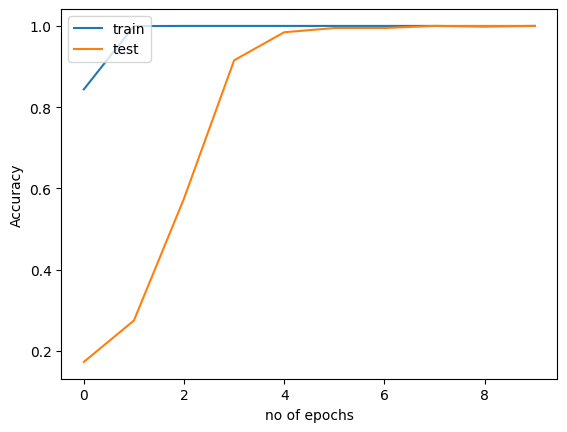

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('no of epochs')
plt.ylabel('Accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()

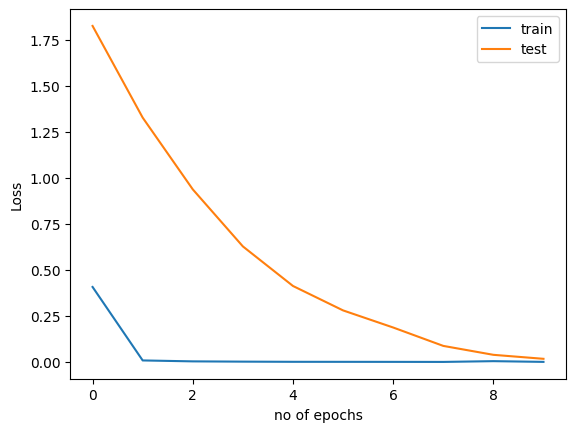

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('no of epochs')
plt.ylabel('Loss')
plt.legend(['train','test'], loc='upper right')
plt.show()

19/19 [==============================] - 0s 3ms/step


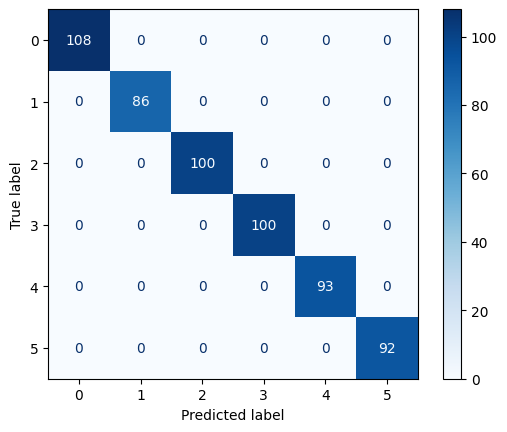

In [ ]:
pred = np.argmax(model.predict(test_x),axis=-1)
test = np.argmax(test_y,axis=-1)
cm = confusion_matrix(test, pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
report = classification_report(test, pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00        86
           2       1.00      1.00      1.00       100
           3       1.00      1.00      1.00       100
           4       1.00      1.00      1.00        93
           5       1.00      1.00      1.00        92

    accuracy                           1.00       579
   macro avg       1.00      1.00      1.00       579
weighted avg       1.00      1.00      1.00       579



# LeNet-5

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(100, 100, 3)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 48, 48, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 147456)            0         
                                                                 
 dense_4 (Dense)             (None, 128)               18874496  
                                                      

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

In [ ]:
history = model.fit(train_x, train_y, validation_data=(test_x , test_y), epochs=10, verbose=1, batch_size=128)

Epoch 1/10
19/19 [==============================] - 7s 142ms/step - loss: 1.7702 - accuracy: 0.6133 - val_loss: 0.4680 - val_accuracy: 0.8394
Epoch 2/10
19/19 [==============================] - 2s 90ms/step - loss: 0.1737 - accuracy: 0.9451 - val_loss: 0.0437 - val_accuracy: 0.9862
Epoch 3/10
19/19 [==============================] - 2s 87ms/step - loss: 0.0463 - accuracy: 0.9857 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 4/10
19/19 [==============================] - 2s 88ms/step - loss: 0.0231 - accuracy: 0.9931 - val_loss: 4.1990e-04 - val_accuracy: 1.0000
Epoch 5/10
19/19 [==============================] - 2s 95ms/step - loss: 0.0131 - accuracy: 0.9965 - val_loss: 1.9348e-04 - val_accuracy: 1.0000
Epoch 6/10
19/19 [==============================] - 2s 95ms/step - loss: 0.0172 - accuracy: 0.9939 - val_loss: 3.4664e-04 - val_accuracy: 1.0000
Epoch 7/10
19/19 [==============================] - 2s 88ms/step - loss: 0.0158 - accuracy: 0.9944 - val_loss: 6.9773e-05 - val_accuracy: 1.0

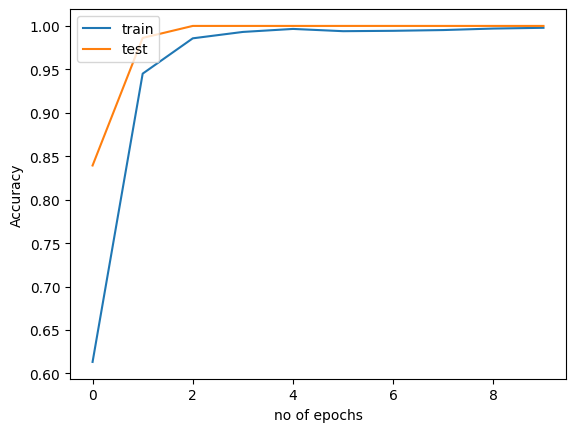

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('no of epochs')
plt.ylabel('Accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()

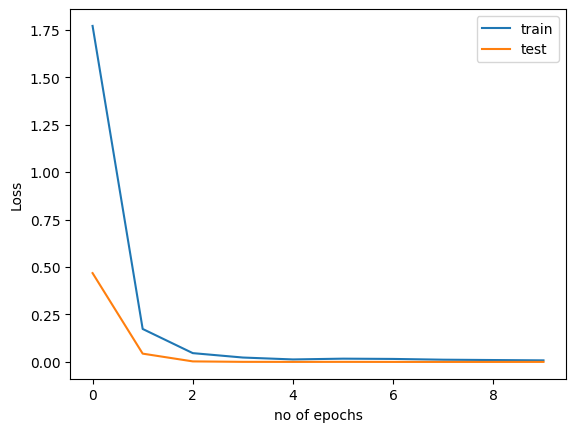

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('no of epochs')
plt.ylabel('Loss')
plt.legend(['train','test'], loc='upper right')
plt.show()

19/19 [==============================] - 0s 9ms/step


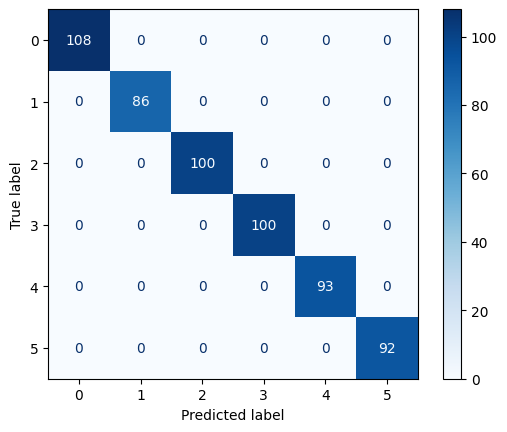

In [ ]:
pred = np.argmax(model.predict(test_x),axis=-1)
test = np.argmax(test_y,axis=-1)
cm = confusion_matrix(test, pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
report = classification_report(test, pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00        86
           2       1.00      1.00      1.00       100
           3       1.00      1.00      1.00       100
           4       1.00      1.00      1.00        93
           5       1.00      1.00      1.00        92

    accuracy                           1.00       579
   macro avg       1.00      1.00      1.00       579
weighted avg       1.00      1.00      1.00       579



AlexNet

In [ ]:
model = Sequential()

model.add(Conv2D(96, kernel_size=(11, 11), strides=(1, 1), activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(1, 1)))
model.add(BatchNormalization())

model.add(Conv2D(256, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(1, 1)))
model.add(BatchNormalization())

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(384, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(384, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(1, 1)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(6, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='tanh'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 90, 90, 96)        34944     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 88, 88, 96)       0         
 2D)                                                             
                                                                 
 batch_normalization_1 (Batc  (None, 88, 88, 96)       384       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 84, 84, 256)       614656    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 82, 82, 256)      0         
 2D)                                                             
                                                      

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

In [ ]:
history = model.fit(train_x, train_y, validation_data=(test_x , test_y), epochs=10, verbose=1, batch_size=128)

Epoch 1/10
19/19 [==============================] - 152s 4s/step - loss: 2.1342 - accuracy: 0.1834 - val_loss: 1.7121 - val_accuracy: 0.2832
Epoch 2/10
19/19 [==============================] - 52s 3s/step - loss: 1.9347 - accuracy: 0.2167 - val_loss: 1.9509 - val_accuracy: 0.1589
Epoch 3/10
19/19 [==============================] - 50s 3s/step - loss: 1.8631 - accuracy: 0.2331 - val_loss: 1.8691 - val_accuracy: 0.3713
Epoch 4/10
19/19 [==============================] - 53s 3s/step - loss: 1.8684 - accuracy: 0.2232 - val_loss: 1.7846 - val_accuracy: 0.3351
Epoch 5/10
19/19 [==============================] - 52s 3s/step - loss: 1.7538 - accuracy: 0.2569 - val_loss: 1.6331 - val_accuracy: 0.3351
Epoch 6/10
19/19 [==============================] - 52s 3s/step - loss: 1.7621 - accuracy: 0.2431 - val_loss: 1.6954 - val_accuracy: 0.4231
Epoch 7/10
19/19 [==============================] - 52s 3s/step - loss: 1.9749 - accuracy: 0.2093 - val_loss: 1.8414 - val_accuracy: 0.2608
Epoch 8/10
19/19 [=

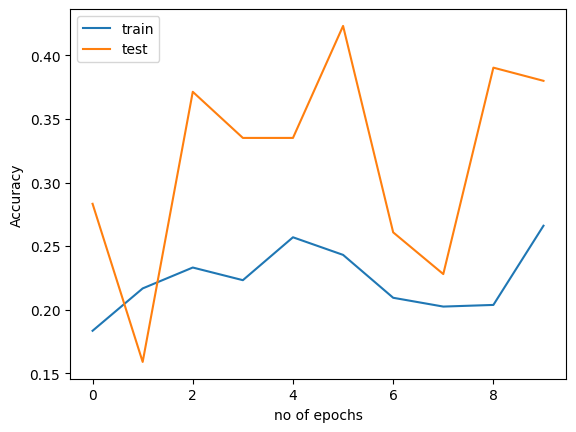

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('no of epochs')
plt.ylabel('Accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('no of epochs')
plt.ylabel('Loss')
plt.legend(['train','test'], loc='upper right')
plt.show()

In [ ]:
pred = np.argmax(model.predict(test_x),axis=-1)
test = np.argmax(test_y,axis=-1)
cm = confusion_matrix(test, pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Dimensionality Reduction

In [ ]:
df = pd.read_csv('/mntDrive/MyDrive/AI/Dimensionality-Reduction/train.csv')

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
X = df.drop('price_range', axis='columns')
y = df['price_range']

In [ ]:
print(X.shape, y.shape)

(2000, 20) (2000,)


In [ ]:
scale = StandardScaler()
X = scale.fit_transform(X)

In [ ]:
model = LogisticRegression(class_weight='balanced')
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=3)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))

0.9591666666666666


 **Principal Component Analysis**

In [ ]:
steps = [('PCA', PCA(n_components=5)), ('m', LogisticRegression(class_weight='balanced'))]
model = Pipeline(steps=steps)

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=20, n_repeats=5, random_state= 5)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))

0.32199999999999995


**Isomap Embedding**

In [ ]:
steps = [('ISO', PCA(n_components=5)), ('m', LogisticRegression(class_weight='balanced'))]
model = Pipeline(steps=steps)

In [ ]:
model = LogisticRegression(class_weight='balanced')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state= 5)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))

0.9646666666666666
